In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import math

Régression linéaire qui a partir de la taille permet de prédire la pointure

In [ ]:
X = [186,175,183,175,184,203,165,165,165,172,185,175,160,187,183,175,171,178,183,190,184,176,185,169,150,166,181,183,175]
Y = [44,43,43,42,45,47,37,39,38,38,45,39,39,42,44,44,41,43,43,44,43,43.5,43,39,36,38,44,42,43]

In [ ]:
df = pd.read_table("Etudiants_TP.csv.txt", sep=';')
df

,TAILLE,POINTURE,SEXE
0,186.0,44,M
1,175.0,43,M
2,183.0,43,M
3,175.0,42,M
4,184.0,45,M
5,203.0,47,M
6,165.0,37,F
7,NaN,39,F
8,165.0,38,F
9,172.0,38,F


Types de caractéristiques?

Taille : Quantitatif

Pointure : Quantitatif

Sexe : Qualitatif Nominal (Peut être trier)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TAILLE    28 non-null     float64
 1   POINTURE  29 non-null     object 
 2   SEXE      29 non-null     object 
dtypes: float64(1), object(2)
memory usage: 824.0+ bytes


In [ ]:
df['POINTURE'] = df['POINTURE'].str.replace(',','.').astype(float)

In [ ]:
df

,TAILLE,POINTURE,SEXE
0,186.0,44.0,M
1,175.0,43.0,M
2,183.0,43.0,M
3,175.0,42.0,M
4,184.0,45.0,M
5,203.0,47.0,M
6,165.0,37.0,F
7,NaN,39.0,F
8,165.0,38.0,F
9,172.0,38.0,F


Fait analyse univariée

Calc Moyenne

In [ ]:
df.POINTURE.mean()

42.810344827586206

La pointure de l'echantillon se résumerait en une seule et unique valeur à 42.81

In [ ]:
df.POINTURE.median()

43.0

Pointure moyenne pour les Hommes et pusi pour les Femmes

In [ ]:
df[df.SEXE=='M']['POINTURE'].mean()

43.425

In [ ]:
df[df.SEXE=='F']['POINTURE'].mean()

41.44444444444444

Moyenne de 41 pour les femmes ??? Parait étrange

<Axes: >

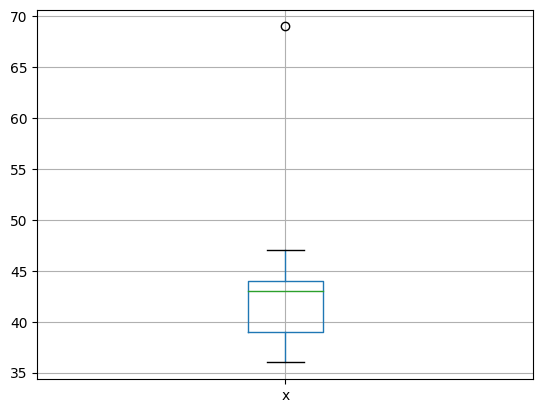

In [ ]:
from pandas.plotting import boxplot
boxplot(df.POINTURE)

J'ai réalisé le boxplot et j'ai réalise qu''il y a avait une valeur aberrante

In [ ]:
q1 = np.quantile(df['POINTURE'], 0.25)
q3 = np.quantile(df['POINTURE'], 0.75)

borne_max = q3+1.5*(q3-q1)
print(borne_max)

51.5


>51.5 = valeur aberante

In [ ]:
df[df['POINTURE']>=borne_max]

,TAILLE,POINTURE,SEXE
12,160.0,69.0,F


observation 12 --> valeur aberrante

on remplace par la moyenne quand on a pas la vraie valeur

içi in a la vraie valeur

In [ ]:
df.POINTURE = df.POINTURE.replace(69,39)

In [ ]:
df[df.SEXE=='F']['POINTURE'].mean()

38.111111111111114

In [ ]:
df.POINTURE.describe()

count    29.000000
mean     41.775862
std       2.782555
min      36.000000
25%      39.000000
50%      43.000000
75%      44.000000
max      47.000000
Name: POINTURE, dtype: float64

les pointures vont du 36 au 47

25% chaussent moins de 39
50% chaussent -43 ou +43
75% chaussent moins de 44 et donc 25% + de 44

On passe à la taille

In [ ]:
df.TAILLE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 29 entries, 0 to 28
Series name: TAILLE
Non-Null Count  Dtype  
--------------  -----  
28 non-null     float64
dtypes: float64(1)
memory usage: 360.0 bytes


identification des valeurs nulles

In [ ]:
df.TAILLE.isna()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
Name: TAILLE, dtype: bool

In [ ]:
df.TAILLE = df.TAILLE.replace(np.nan,165)
df

,TAILLE,POINTURE,SEXE
0,186.0,44.0,M
1,175.0,43.0,M
2,183.0,43.0,M
3,175.0,42.0,M
4,184.0,45.0,M
5,203.0,47.0,M
6,165.0,37.0,F
7,165.0,39.0,F
8,165.0,38.0,F
9,172.0,38.0,F


<Axes: >

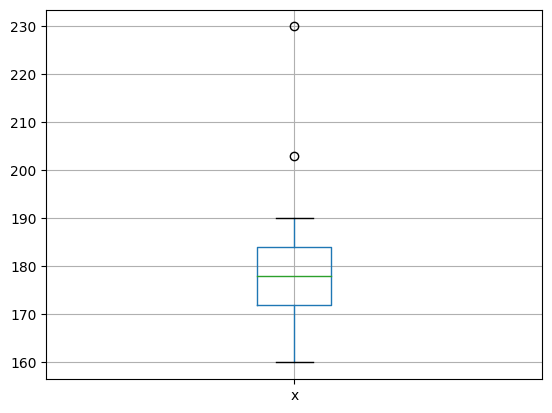

In [ ]:
from pandas.plotting import boxplot
boxplot(df.TAILLE)

In [ ]:
q1 = np.quantile(df['TAILLE'], 0.25)
q3 = np.quantile(df['TAILLE'], 0.75)

borne_max = q3+1.5*(q3-q1)
print(borne_max)

df[df['TAILLE']>=borne_max]

202.0


,TAILLE,POINTURE,SEXE
5,203.0,47.0,M
24,230.0,36.0,F


In [ ]:
df.TAILLE = df.TAILLE.replace(230,150)
df

,TAILLE,POINTURE,SEXE
0,186.0,44.0,M
1,175.0,43.0,M
2,183.0,43.0,M
3,175.0,42.0,M
4,184.0,45.0,M
5,203.0,47.0,M
6,165.0,37.0,F
7,165.0,39.0,F
8,165.0,38.0,F
9,172.0,38.0,F


In [ ]:
df.TAILLE.describe()

count     29.000000
mean     176.862069
std       10.571944
min      150.000000
25%      171.000000
50%      176.000000
75%      184.000000
max      203.000000
Name: TAILLE, dtype: float64

In [ ]:
import scipy.stats as stats
from scipy import stats as st
st.variation(df.TAILLE, ddof=1)

0.05977508083375564

Ce coef de variation est de 5.9%, c'est inférieur à 25% donc la taille est peu dispersée

Analyse bivariée

- Covariance
- Coeff de correlation linéaire

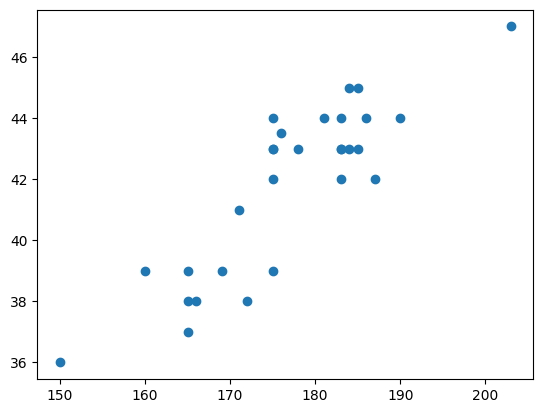

In [ ]:
plt.scatter(df.TAILLE, df.POINTURE)

On constate que lorsqeu la taille augmente, la pointure augmente également. On a donc une covariance positive dans le même sens.

Calcul du la Covariance

In [ ]:
np.cov(df.TAILLE,df.POINTURE)

array([[111.76600985,  25.48583744],
       [ 25.48583744,   7.74261084]])

In [ ]:
# calcul de la moyenne de chaque ensemble de données
X = df.TAILLE
Y = df.POINTURE

moyenne_x = sum(X) / len(X)
moyenne_y = sum(Y) / len(Y)

# calcul de la variance de chaque ensemble de données
variance_x = sum((Xi - moyenne_x) ** 2 for Xi in X) / (len(X) - 1)
variance_y = sum((Yi - moyenne_y) ** 2 for Yi in Y) / (len(Y) - 1)

# calcul de l'écart-type de chaque ensemble de données
ecart_type_x = math.sqrt(variance_x)
ecart_type_y = math.sqrt(variance_y)

# calcul de la covariance entre les deux ensembles de données
covariance = sum((X[i] - moyenne_x) * (Y[i] - moyenne_y) for i in range(len(X))) / (len(X) - 1)

# calcul du coefficient de corrélation linéaire
coefficient_corr = covariance / (ecart_type_x * ecart_type_y)

# affichage du résultat
print("Le coefficient de corrélation linéaire entre x et y est :", coefficient_corr)

Le coefficient de corrélation linéaire entre x et y est : 0.866363844517153


Avec ce coeff, j'en déduis que la taille et la pointure sont liées de manière linéaire. Elles evoluent récirpoquement et positivemet.
On peut donc appliquer un algo de regression linéaire

équation : Pointure_estimée = Beta0 + Beta1 * Taille1

- Calcul de Beta 0 et Beta 1
- Faire la prédiction
- Evaluation de l'algo (MSE, RMSE, R2)
- Conclusion générale

##Afficher une boite a moustache pour identifier les valeurs aberrantes 

In [ ]:
df1 = pd.DataFrame(X,columns=["X"])
df2 = pd.DataFrame(Y,columns=["Y"])

def mode(X):
  u = np.unique(X)
  n=[]
  for v in u:
    ni = np.count_nonzero(X==v)
    n.append(ni)

  vMax = max(n)

  modes = []
  for i in range(0,len(u)):
    if n[i] == vMax:
      modes.append(u[i])
  print("Mode(s) = ",modes, " - effectif :",vMax)

  df1["X"].median()

  df2["Y"].median()

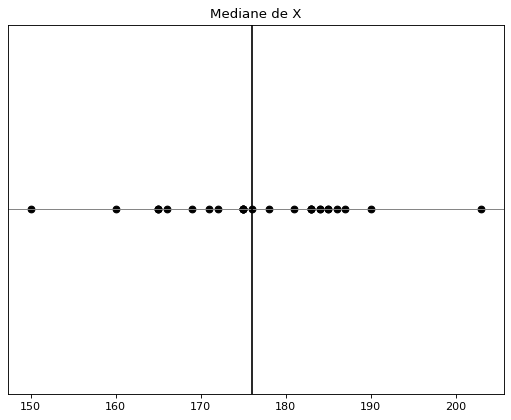

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot(X, np.zeros(len(X)), 'o',color="black")
plt.axhline(y=0, color='gray', linewidth=0.85)
plt.title("Mediane de X")
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.axvline(np.median(X),color="black")
plt.show()

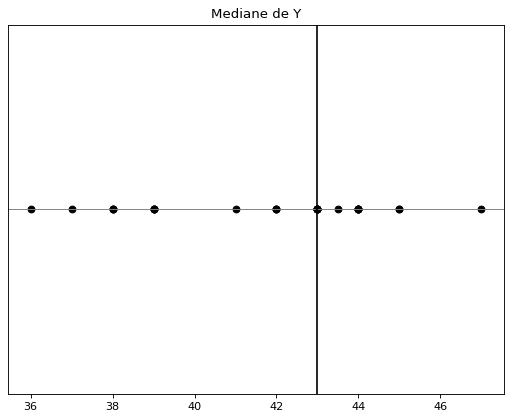

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot(Y, np.zeros(len(Y)), 'o',color="black")
plt.axhline(y=0, color='gray', linewidth=0.85)
plt.title("Mediane de Y")
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.axvline(np.median(Y),color="black")
plt.show()

In [ ]:
print(sorted(X))

[150.0, 160.0, 165.0, 165.0, 165.0, 166.0, 169.0, 171.0, 172.0, 175.0, 175.0, 175.0, 175.0, 175.0, 176.0, 178.0, 181.0, 183.0, 183.0, 183.0, 183.0, 184.0, 184.0, 185.0, 185.0, 186.0, 187.0, 190.0, 203.0]


In [ ]:
print(sorted(Y))

[36.0, 37.0, 38.0, 38.0, 38.0, 39.0, 39.0, 39.0, 39.0, 41.0, 42.0, 42.0, 42.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.5, 44.0, 44.0, 44.0, 44.0, 44.0, 45.0, 45.0, 47.0]


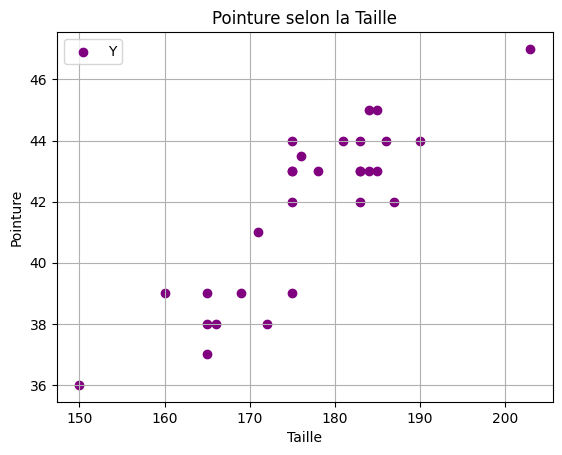

In [ ]:
plt.scatter(X, Y, color = 'Purple', marker='o', label='Y')
plt.xlabel('Taille')
plt.ylabel('Pointure')
plt.title('Pointure selon la Taille')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data = pd.DataFrame()
data["X"] = X
data["Y"] = Y

In [ ]:
data.head(20)

,X,Y
0,186.0,44.0
1,175.0,43.0
2,183.0,43.0
3,175.0,42.0
4,184.0,45.0
5,203.0,47.0
6,165.0,37.0
7,165.0,39.0
8,165.0,38.0
9,172.0,38.0


A partir de X :Taille, je vais chercher à prédire la pointure

Il s'agit d'apprentissage supervisée, on lui dit d'obtenir


y = ax + b

Pour l'utiliser en **ML** : **Y = β0 + β1X + ϵ**

In [ ]:
#Calcul de la moyenne
def calcMoyenne(X):
  n = len(X)
  somme = 0
  for i in range(0,n) :
    xi = X[i]
    somme += xi
  return somme/n

In [ ]:
print(" La moyenne de X est : ",calcMoyenne(X))

 La moyenne de X est :  176.86206896551724


In [ ]:
print(" La moyenne de Y est : ",calcMoyenne(Y))

 La moyenne de Y est :  41.775862068965516


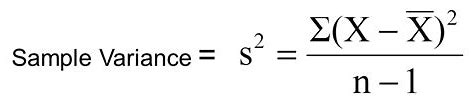

Indicateur de dispersion qui pour savoir si les données sont dispersées
autour de la moyenne

In [ ]:
#Calcul de la variance
def calcVariance(X):
  n = len(X)
  xBar = calcMoyenne(X)
  somme = 0
  for i in range(0, len(X)):
    xi = X[i]
    somme += (xi - xBar)**2
  return (1/(n-1))*somme

print("La Variance de X est de : ",calcVariance(X))
print("La Variance de Y est de : ",calcVariance(Y))

La Variance de X est de :  111.76600985221677
La Variance de Y est de :  7.742610837438424


In [ ]:
#Calcul ecart type
def calcEcarType(X):
  variance = calcVariance(X)
  return np.sqrt(variance)

print("L'écart type de X est de :", calcEcarType(X))
print("L'écart type de Y est de :", calcEcarType(Y))

L'écart type de X est de : 10.571944468839058
L'écart type de Y est de : 2.782554732155043


In [ ]:
# calcul de la moyenne de chaque ensemble de données
moyenne_X = sum(X) / len(Y)
moyenne_Y = sum(Y) / len(Y)

# calcul de la covariance
covariance = sum((X[i] - moyenne_X) * (Y[i] - moyenne_Y) for i in range(len(X))) / (len(X) - 1)

# affichage du résultat
print("La covariance entre x et y est :", covariance)


La covariance entre x et y est : 25.485837438423648


In [ ]:
#calcul de la covariance

def calcCov(X,Y):
  n = len(X)
  xBar = calcMoyenne(X)
  yBar = calcMoyenne(Y)

  somme = 0
  for i in range(0,len(X)):
    xi = X[i]
    yi = Y[i]
    somme += (xi - xBar) * (yi - yBar)
  return (1/(n-1))*somme

print("La covariance entre x et y est :",calcCov(X,Y))

La covariance entre x et y est : 25.485837438423644


In [ ]:
#Matrice de covariance

np.cov(X,Y)

array([[111.76600985,  25.48583744],
       [ 25.48583744,   7.74261084]])

In [ ]:
# calcul de la moyenne de chaque ensemble de données
moyenne_x = sum(X) / len(X)
moyenne_y = sum(Y) / len(Y)

# calcul de la variance de chaque ensemble de données
variance_x = sum((Xi - moyenne_x) ** 2 for Xi in X) / (len(X) - 1)
variance_y = sum((Yi - moyenne_y) ** 2 for Yi in Y) / (len(Y) - 1)

# calcul de l'écart-type de chaque ensemble de données
ecart_type_x = math.sqrt(variance_x)
ecart_type_y = math.sqrt(variance_y)

# calcul de la covariance entre les deux ensembles de données
covariance = sum((X[i] - moyenne_x) * (Y[i] - moyenne_y) for i in range(len(X))) / (len(X) - 1)

# calcul du coefficient de corrélation linéaire
coefficient_corr = covariance / (ecart_type_x * ecart_type_y)

# affichage du résultat
print("Le coefficient de corrélation linéaire entre x et y est :", coefficient_corr)

Le coefficient de corrélation linéaire entre x et y est : 0.866363844517153


In [ ]:
covXY = calcCov(X,Y)
print("Covariance XY = ", covXY)

varianceX = calcVariance(X)
print("Variance X =",varianceX)

beta_1 = covXY / varianceX
print(beta_1)

Covariance XY =  25.485837438423644
Variance X = 111.76600985221677
0.22802851664940382


In [ ]:
calcMoyenne(Y)

41.775862068965516

In [ ]:
XBarre = calcMoyenne(X)
YBarre = calcMoyenne(Y)
beta_0 = YBarre - beta_1 * XBarre
print(beta_0)

1.4462668312140607


In [ ]:
def predire(x,beta_0,beta_1):
  return beta_0 + X * beta_1

In [ ]:
xvalues = np.arange(0,max(X) + 2, 0.1)

predictions = [44.23,41.7,43.54,41.7,43.77,48.14,39.4,39.4,39.4,41.01,44,41.7,38.25,44.46,43.54,41.7,40.78,42.39,43.54,45.15,43.77,41.93,44,40.32,35.95,39.63,43.08,43.54,41.7]

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Définir les données X et Y
X = [186,175,183,175,184,203,165,165,165,172,185,175,160,187,183,175,171,178,183,190,184,176,185,169,150,166,181,183,175]
Y = [44,43,43,42,45,47,37,39,38,38,45,39,39,42,44,44,41,43,43,44,43,43.5,43,39,36,38,44,42,43]

# Créer un DataFrame à partir des données X et Y
df = pd.DataFrame({'X': X, 'Y': Y})

# Créer un objet de modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données existantes
model.fit(df[['X']], df['Y'])

# Obtenir les coefficients de régression linéaire
beta1 = model.coef_[0]
beta0 = model.intercept_

# Prédire les valeurs de ^Y en utilisant le modèle entraîné
df['^Y'] = model.predict(df[['X']])

# Ajouter une colonne 'diff' pour calculer la différence entre Y et ^Y
df['diff'] = df['Y'] - df['^Y']

# Calculer la MSE et RMSE
mse = mean_squared_error(df['Y'], df['^Y'])
rmse = np.sqrt(mse)

# Afficher les résultats
print('beta0: ', beta0)
print('beta1: ', beta1)
print('MSE: ', mse)
print('RMSE: ', rmse)

# Afficher le DataFrame mis à jour
print(df)


beta0:  1.4462668312140465
beta1:  0.2280285166494039
MSE:  1.8645230228286687
RMSE:  1.365475383457596
      X     Y         ^Y      diff
0   186  44.0  43.859571  0.140429
1   175  43.0  41.351257  1.648743
2   183  43.0  43.175485 -0.175485
3   175  42.0  41.351257  0.648743
4   184  45.0  43.403514  1.596486
5   203  47.0  47.736056 -0.736056
6   165  37.0  39.070972 -2.070972
7   165  39.0  39.070972 -0.070972
8   165  38.0  39.070972 -1.070972
9   172  38.0  40.667172 -2.667172
10  185  45.0  43.631542  1.368458
11  175  39.0  41.351257 -2.351257
12  160  39.0  37.930829  1.069171
13  187  42.0  44.087599 -2.087599
14  183  44.0  43.175485  0.824515
15  175  44.0  41.351257  2.648743
16  171  41.0  40.439143  0.560857
17  178  43.0  42.035343  0.964657
18  183  43.0  43.175485 -0.175485
19  190  44.0  44.771685 -0.771685
20  184  43.0  43.403514 -0.403514
21  176  43.5  41.579286  1.920714
22  185  43.0  43.631542 -0.631542
23  169  39.0  39.983086 -0.983086
24  150  36.0  35.650

In [ ]:
import numpy as np

# Convertir les listes X et Y en un tableau numpy 2D
data = np.column_stack((X, Y))

# Calculer les quartiles Q1 et Q3 pour chaque colonne
Q1 = np.percentile(data, 25, axis=0)
Q3 = np.percentile(data, 75, axis=0)

# Calculer l'écart interquartile (IQR) pour chaque colonne
IQR = Q3 - Q1

# Définir les limites supérieure et inférieure pour détecter les valeurs aberrantes
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Trouver les indices des valeurs aberrantes pour chaque colonne
outliers_X = np.where((data[:,0] > upper_bound[0]) | (data[:,0] < lower_bound[0]))
outliers_Y = np.where((data[:,1] > upper_bound[1]) | (data[:,1] < lower_bound[1]))

# Afficher les indices des valeurs aberrantes
print("Indices des valeurs aberrantes pour X :", outliers_X)
print("Indices des valeurs aberrantes pour Y :", outliers_Y)


Indices des valeurs aberrantes pour X : (array([24]),)
Indices des valeurs aberrantes pour Y : (array([], dtype=int64),)


In [ ]:
print(np.array(X).shape)  # Affiche la forme de X
print(np.array(Y).shape)  # Affiche la forme de Y


from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(np.array(X).reshape(-1,1),Y)

print(reg.coef_) #Beta 1, Beta 2, ...., Beta n
print(reg.intercept_) #Beta 0

(29,)
(29,)
[0.22802852]
1.4462668312140465


In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(Y, predictions)
RMSE = mean_squared_error(Y,predictions, squared=False)
print(MSE)
print(RMSE)

1.9891379310344812
1.4103680126245353
